import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
(x_Train , y_Train),(x_Test , y_Test) = mnist.load_data()

In [2]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [5]:
model = Sequential()
model.add(Conv2D(filters=16,
            kernel_size=(5,5),
            padding='same',
            input_shape=(28,28,1),
            activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D( filters=36,
            kernel_size=(5,5),
            padding='same',
            activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #建立平坦層，進行攤平
model.add(Dense(128, activation='relu')) #建立隱藏層
model.add(Dropout(0.5)) #Dropout
model.add(Dense(10, activation='softmax')) #建立輸出層
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 26s - loss: 0.4977 - accuracy: 0.8441 - val_loss: 0.0995 - val_accuracy: 0.9689
Epoch 2/10
 - 24s - loss: 0.1391 - accuracy: 0.9585 - val_loss: 0.0661 - val_accuracy: 0.9812
Epoch 3/10
 - 39s - loss: 0.0994 - accuracy: 0.9701 - val_loss: 0.0596 - val_accuracy: 0.9826
Epoch 4/10
 - 28s - loss: 0.0808 - accuracy: 0.9764 - val_loss: 0.0461 - val_accuracy: 0.9868
Epoch 5/10
 - 33s - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.0433 - val_accuracy: 0.9880
Epoch 6/10
 - 29s - loss: 0.0629 - accuracy: 0.9813 - val_loss: 0.0390 - val_accuracy: 0.9893
Epoch 7/10
 - 33s - loss: 0.0518 - accuracy: 0.9842 - val_loss: 0.0420 - val_accuracy: 0.9886
Epoch 8/10
 - 36s - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 9/10
 - 27s - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0355 - val_accuracy: 0.9903
Epoch 10/10
 - 35s - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0302 - val_accuracy: 0.9913


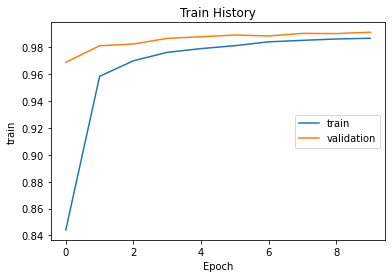

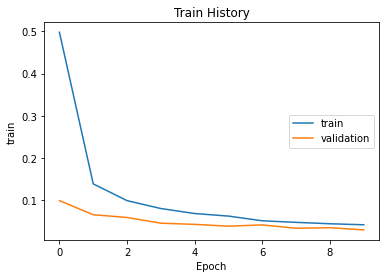

10000/10000 [==============================] - 2s 231us/step

Loss: 0.02, Accuracy: 99.20%


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1130,2,0,0,0,1,0,2,0
2,1,0,1029,0,0,0,0,2,0,0
3,0,0,1,1002,0,3,0,2,2,0
4,0,0,0,0,979,0,1,0,1,1
5,1,0,0,5,0,885,1,0,0,0
6,4,1,0,0,1,3,949,0,0,0
7,0,3,5,2,0,0,0,1013,1,4
8,3,0,1,1,0,0,0,2,966,1


In [6]:
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=10, batch_size=300,verbose=2)
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
import matplotlib.pyplot as plt
show_train_history(train_history, 'accuracy','val_accuracy')
show_train_history(train_history, 'loss','val_loss')
loss, accuracy = model.evaluate(x_Test4D_normalize , y_TestOneHot)
print( "\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy* 100 ))
import pandas as pd
prediction=model.predict_classes(x_Test4D_normalize)
pd.crosstab(y_Test,prediction,rownames=['label'],
colnames=['predict'])